<a href="https://colab.research.google.com/github/nouraoaldawsari/T5/blob/main/TrafficSignDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Essential Library for YOLO model

In [ ]:
# Install Essential Libraries
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

# Visualizing Sample of our data

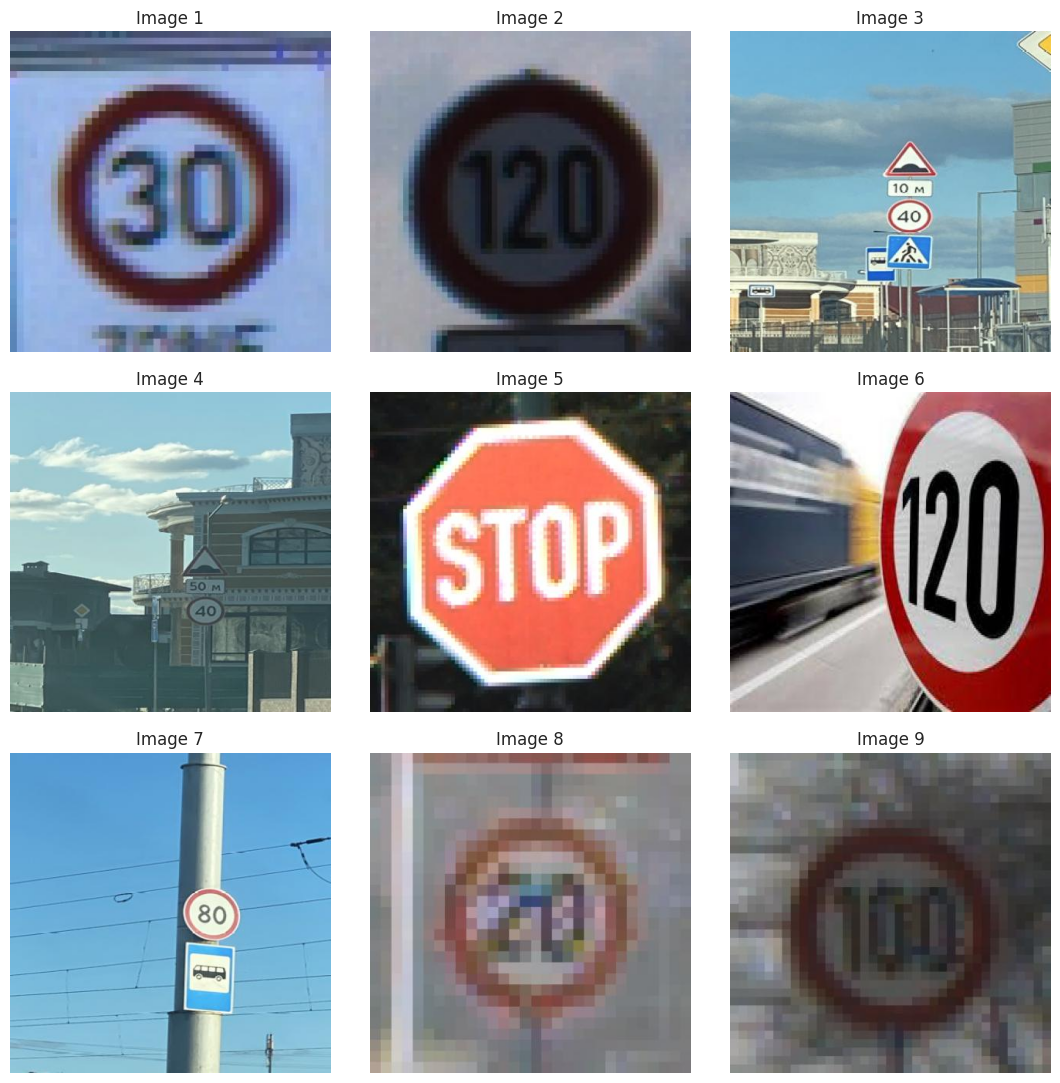

In [ ]:
Image_dir = '/content/drive/MyDrive/car_dataset/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Get the size of the image
image = cv2.imread("/content/drive/MyDrive/car_dataset/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


100%|██████████| 6.25M/6.25M [00:00<00:00, 368MB/s]



image 1/1 /content/drive/MyDrive/car_dataset/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 7.7ms
Speed: 15.7ms preprocess, 7.7ms inference, 110.0ms postprocess per image at shape (1, 3, 640, 640)


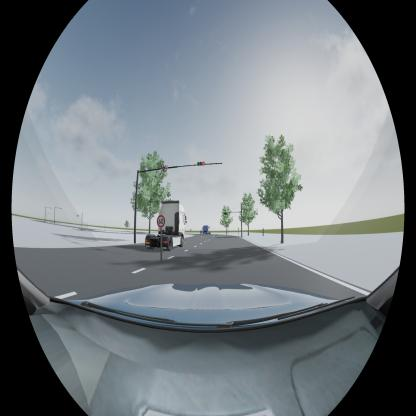

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/drive/MyDrive/car_dataset/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
!pip install --upgrade ultralytics ray #for parallel computing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 34.9 MB/s eta 0:00:00


#Training the pretrained model on our data

In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/drive/MyDrive/car_dataset/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/car_dataset/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

100%|██████████| 755k/755k [00:00<00:00, 88.8MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/car_dataset/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [06:37<00:00,  8.88it/s]


train: New cache created: /content/drive/MyDrive/car_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/car_dataset/valid/labels... 801 images, 10 backgrounds, 0 corrupt: 100%|██████████| 811/811 [01:30<00:00,  8.92it/s]


val: New cache created: /content/drive/MyDrive/car_dataset/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001640625), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      27.5G      1.052      4.337      1.348        417        640: 100%|██████████| 17/17 [00:18<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.02s/it]

                   all        811        944     0.0597      0.349     0.0601     0.0498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      27.5G     0.7514      3.482      1.127        350        640: 100%|██████████| 17/17 [00:16<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.84s/it]

                   all        811        944     0.0604      0.705      0.106     0.0902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      27.5G     0.7167      2.859      1.086        391        640: 100%|██████████| 17/17 [00:11<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all        811        944      0.038      0.776      0.205      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      27.5G     0.6835      2.468      1.048        367        640: 100%|██████████| 17/17 [00:12<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all        811        944      0.469      0.292      0.308      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      27.5G     0.6766      2.229      1.037        349        640: 100%|██████████| 17/17 [00:13<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        811        944      0.451      0.386      0.399      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      27.4G     0.6518      1.977      1.032        401        640: 100%|██████████| 17/17 [00:12<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all        811        944      0.543      0.507       0.55      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      27.4G     0.6465      1.792      1.025        367        640: 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.75s/it]

                   all        811        944      0.624      0.597      0.655      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      27.4G      0.649      1.621       1.02        416        640: 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        811        944       0.71      0.666      0.745      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      27.5G     0.6213      1.484      1.008        337        640: 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.66s/it]

                   all        811        944      0.796      0.692      0.775      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      27.4G      0.604      1.393     0.9993        398        640: 100%|██████████| 17/17 [00:11<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all        811        944      0.777      0.722      0.799       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      27.4G     0.6041      1.336          1        406        640: 100%|██████████| 17/17 [00:12<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all        811        944      0.845      0.739      0.839      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      27.4G     0.5977      1.248     0.9927        349        640: 100%|██████████| 17/17 [00:11<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all        811        944      0.869      0.762      0.858      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      27.4G      0.597      1.204     0.9892        391        640: 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        811        944      0.863      0.792      0.867      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      27.5G     0.5803      1.131     0.9848        380        640: 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.73s/it]

                   all        811        944      0.884      0.793      0.874       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      27.4G     0.5729      1.092     0.9839        379        640: 100%|██████████| 17/17 [00:12<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all        811        944      0.896       0.82      0.898      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      27.4G      0.555      1.048     0.9744        368        640: 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        811        944      0.882       0.83      0.902      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      27.5G     0.5656      1.018     0.9737        363        640: 100%|██████████| 17/17 [00:11<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.69s/it]

                   all        811        944      0.899      0.786      0.892       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      27.4G     0.5553     0.9973     0.9704        365        640: 100%|██████████| 17/17 [00:11<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all        811        944      0.923      0.817      0.909      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      27.5G     0.5679     0.9769     0.9717        378        640: 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        811        944      0.937      0.815      0.903       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      27.4G     0.5533     0.9508     0.9657        356        640: 100%|██████████| 17/17 [00:11<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.72s/it]

                   all        811        944      0.913      0.837      0.913       0.77


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      27.3G     0.5434     0.9631      0.934        193        640: 100%|██████████| 17/17 [00:17<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        811        944      0.919       0.82      0.904      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      27.2G     0.5375     0.8907     0.9276        210        640: 100%|██████████| 17/17 [00:12<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all        811        944      0.923      0.842      0.921      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      27.3G      0.534     0.8397     0.9326        196        640: 100%|██████████| 17/17 [00:11<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all        811        944      0.928      0.867      0.935      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      27.3G     0.5307     0.8025     0.9285        211        640: 100%|██████████| 17/17 [00:11<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all        811        944      0.947      0.856      0.935      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      27.4G     0.5199     0.7796     0.9175        209        640: 100%|██████████| 17/17 [00:11<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all        811        944      0.928       0.88      0.942       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      27.4G     0.5095     0.7498     0.9135        213        640: 100%|██████████| 17/17 [00:10<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        811        944      0.914      0.871      0.937      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      27.3G     0.5061     0.7287     0.9106        208        640: 100%|██████████| 17/17 [00:11<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]

                   all        811        944      0.907      0.886       0.94       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      27.3G     0.5005     0.7169     0.9129        209        640: 100%|██████████| 17/17 [00:11<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]

                   all        811        944      0.919      0.889      0.941      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      27.3G     0.4913     0.6961     0.9045        206        640: 100%|██████████| 17/17 [00:12<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all        811        944      0.929      0.879      0.942      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      27.3G     0.4884     0.6904     0.9072        199        640: 100%|██████████| 17/17 [00:11<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.64s/it]

                   all        811        944       0.91      0.895      0.941      0.812



30 epochs completed in 0.143 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.56s/it]


                   all        811        944      0.929      0.879      0.942      0.814
           Green Light         87        122      0.901      0.672      0.794      0.484
             Red Light         74        108      0.848      0.725      0.807       0.48
       Speed Limit 100         52         52      0.908      0.942      0.977      0.875
       Speed Limit 110         17         17      0.768      0.824      0.925      0.874
       Speed Limit 120         60         60      0.982      0.967      0.992      0.909
        Speed Limit 20         56         56       0.96      0.982      0.985      0.862
        Speed Limit 30         71         74      0.973      0.959      0.981      0.927
        Speed Limit 40         53         55      0.913      0.953      0.986      0.869
        Speed Limit 50         68         71      0.963      0.817      0.945      0.833
        Speed Limit 60         76         76      0.921      0.882      0.947      0.861
        Speed Limit 7

# Visualizing curve results

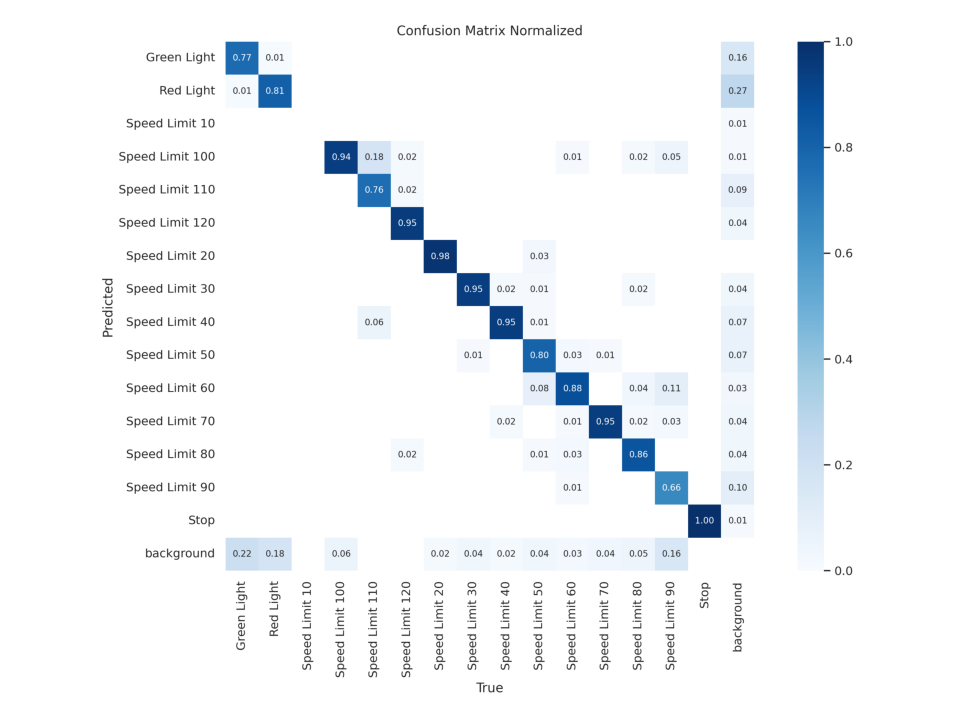

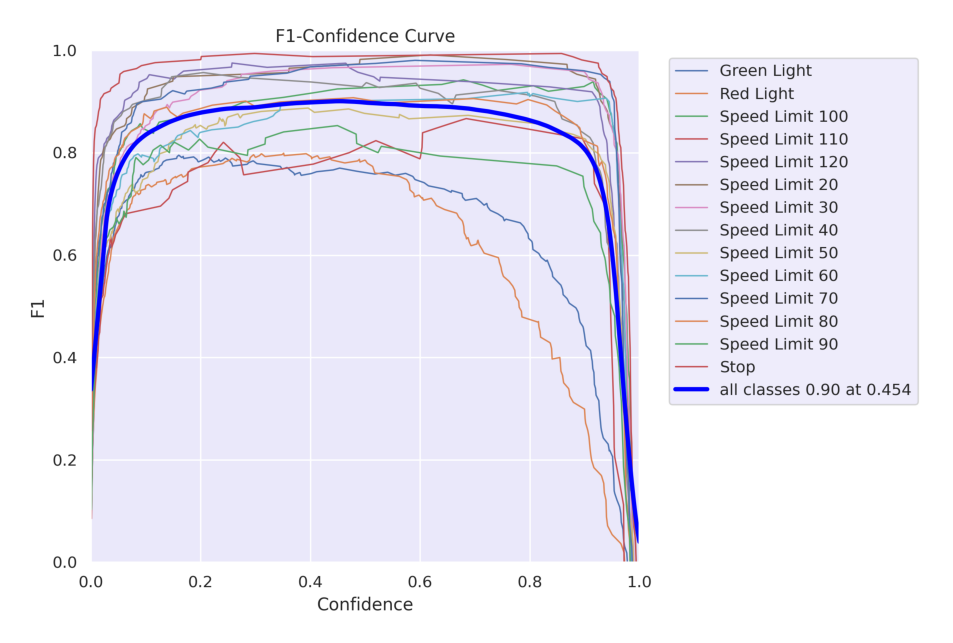

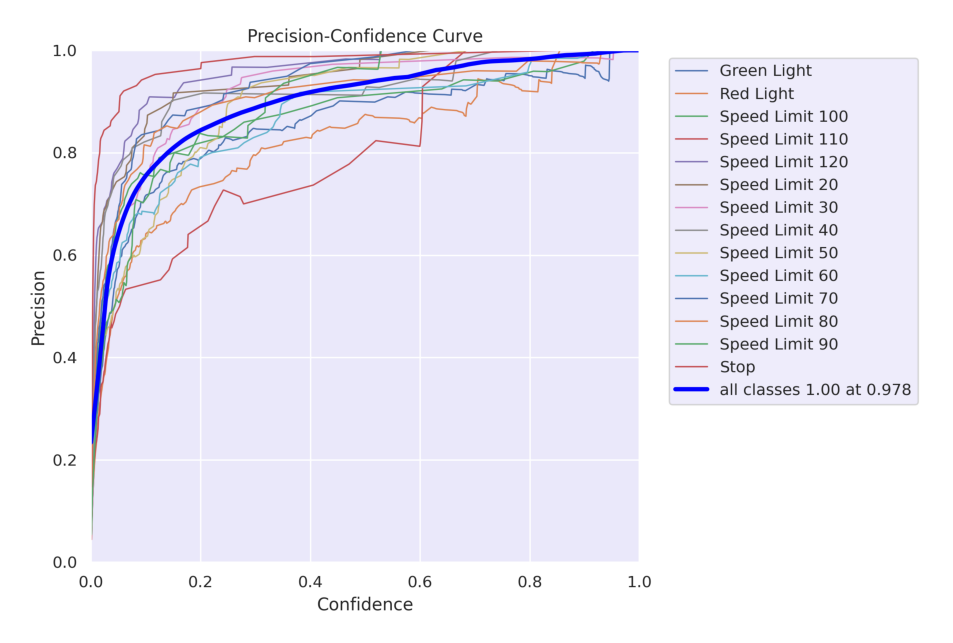

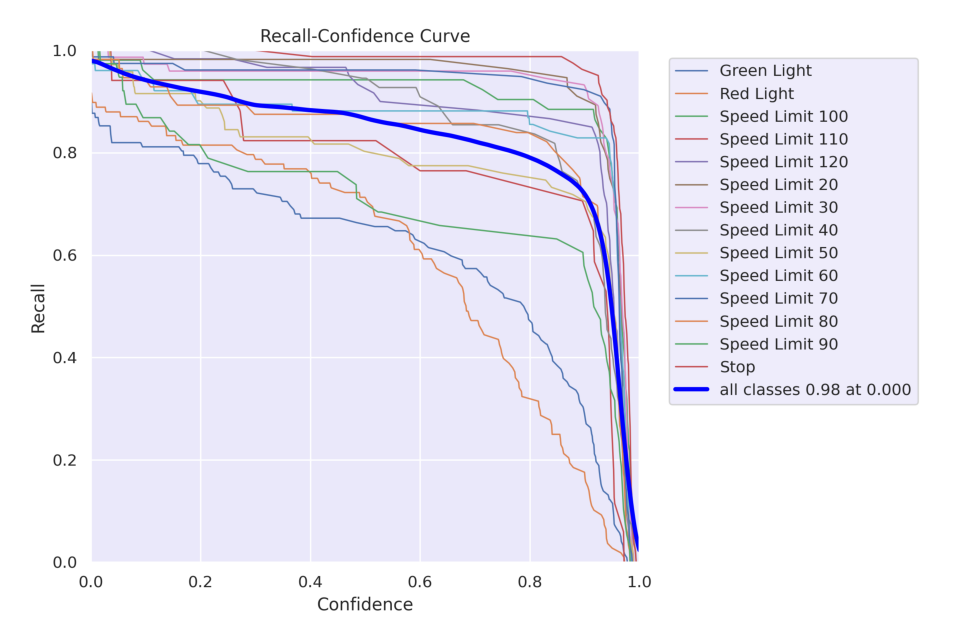

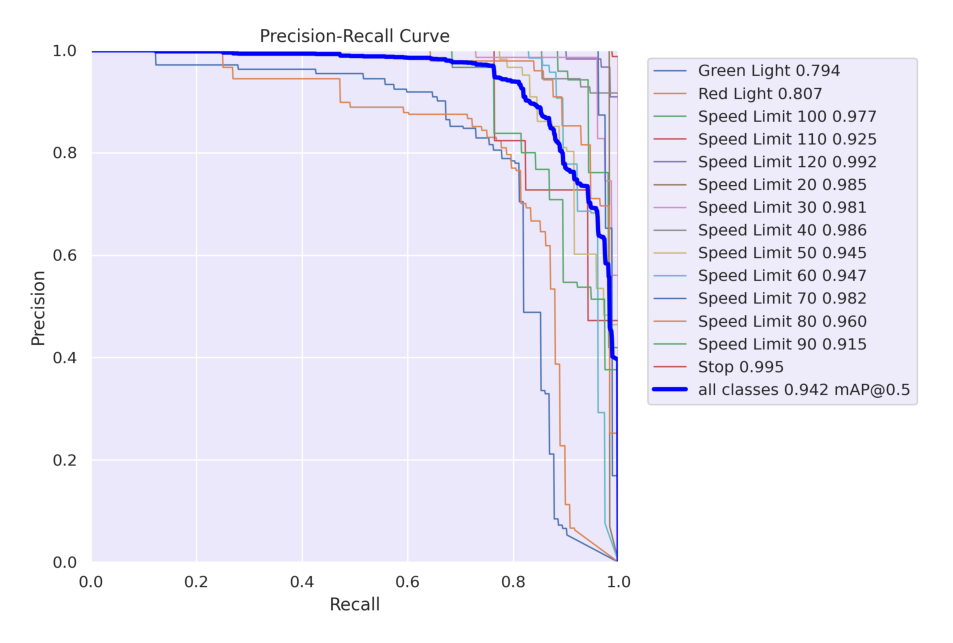

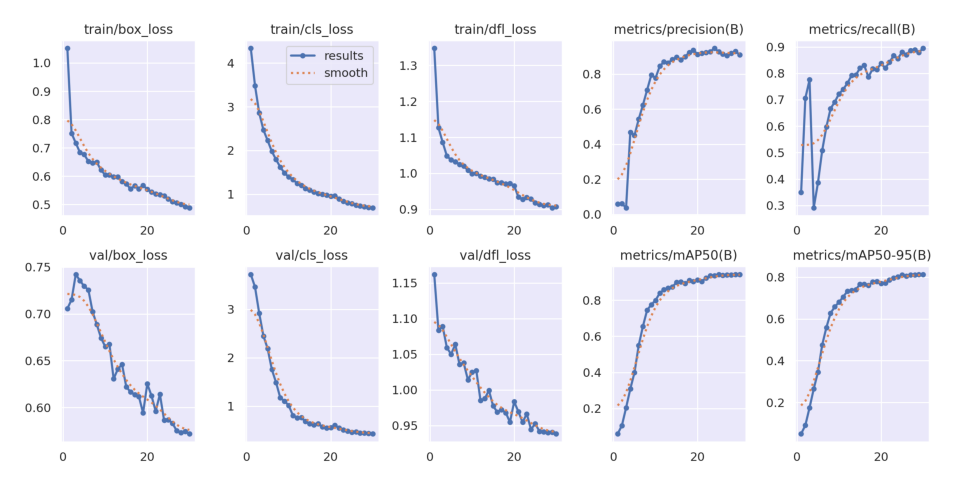

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

In [ ]:
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
20                       21                  0.54342                  0.96307   
21                       22                  0.53750                  0.89074   
22                       23                  0.53402                  0.83971   
23                       24                  0.53068                  0.80252   
24                       25                  0.51989                  0.77958   
25                       26                  0.50948                  0.74982   
26                       27                  0.50611                  0.72875   
27                       28                  0.50052                  0.71690   
28                       29                  0.49133                  0.69611   
29                       30                  0.48843                  0.69040   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
20                  0.93404                  0.91912                  0.81955   
21                  0.92758                  0.92292                  0.84181   
22                  0.93258                  0.92845                  0.86685   
23                  0.92847                  0.94709                  0.85600   
24                  0.91751                  0.92763                  0.88014   
25                  0.91351                  0.91375                  0.87066   
26                  0.91064                  0.90658                  0.88619   
27                  0.91289                  0.91898                  0.88852   
28                  0.90448                  0.92906                  0.87906   
29                  0.90722                  0.91019                  0.89459   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
20                  0.90398                  0.77254                  0.61254   
21                  0.92147                  0.78738                  0.59593   
22                  0.93535                  0.79690                  0.61414   
23                  0.93479                  0.80212                  0.58621   
24                  0.94179                  0.81013                  0.58694   
25                  0.93717                  0.80488                  0.58294   
26                  0.93974                  0.81011                  0.57510   
27                  0.94060                  0.81121                  0.57308   
28                  0.94227                  0.81333                  0.57441   
29                  0.94139                  0.81198                  0.57186   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
20                  0.60713                  0.96947                 0.000179   
21                  0.54708                  0.95458                 0.000161   
22                  0.50989                  0.96637                 0.000144   
23                  0.48796                  0.94455                 0.000127   
24                  0.46160                  0.95261                 0.000109   
25                  0.46896                  0.94191                 0.000092   
26                  0.44900                  0.94088                 0.000075   
27                  0.44398                  0.93978                 0.000057   
28                  0.43513                  0.94063                 0.000040   
29                  0.43022                  0.93837                 0.000023   

                     lr/pg1                   lr/pg2  
20                 0.000179                 0.000179  
21                 0.000161                 0.000161  
22                 0.000144                 0.000144  
23                 0.000127                 0.000127  
24                 0.000109                 0.000109  
25                 0.000092                 0.000092  
26                 0.000075                 0.000075  
27            

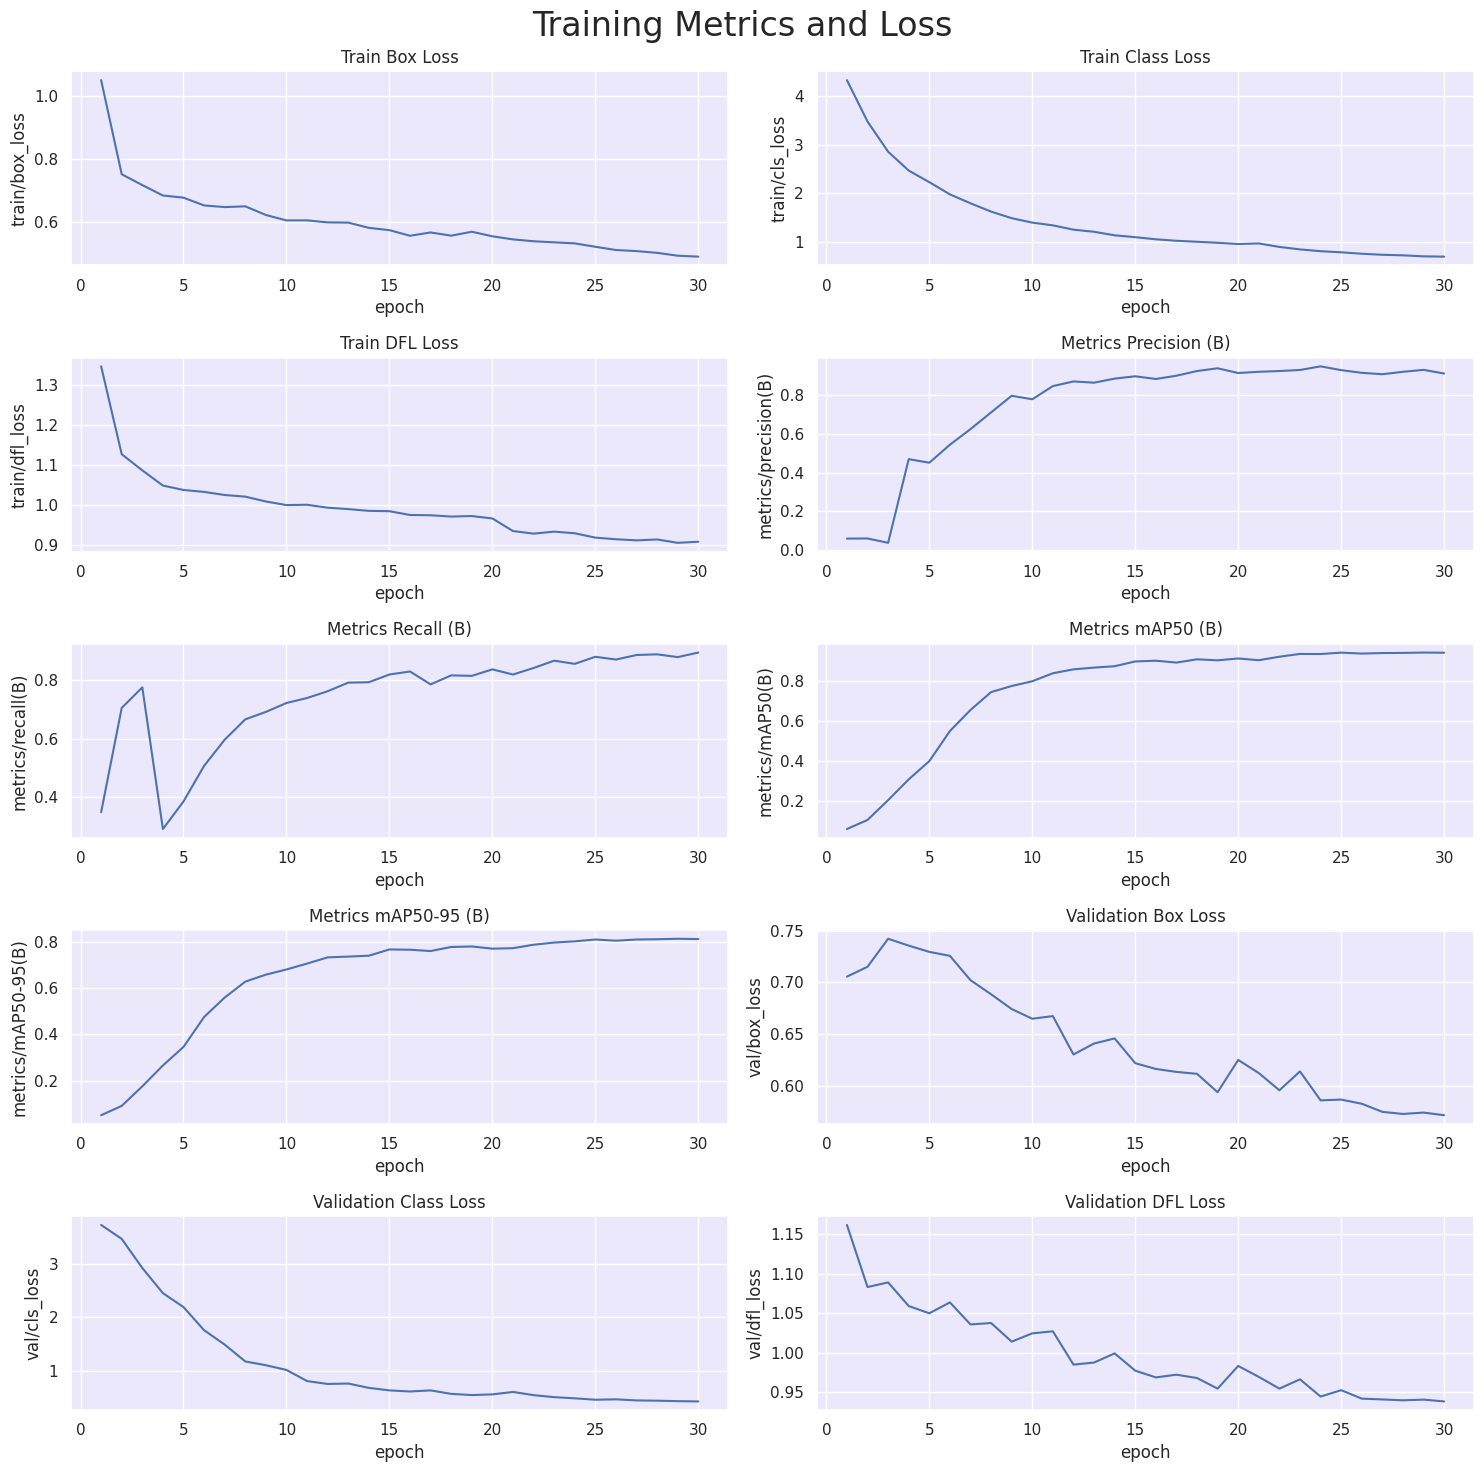

In [ ]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [ ]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/car_dataset/valid/labels.cache... 801 images, 10 backgrounds, 0 corrupt: 100%|██████████| 811/811 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:08<00:00,  5.84it/s]


                   all        811        944      0.929      0.879      0.942      0.815
           Green Light         87        122        0.9      0.672      0.794      0.485
             Red Light         74        108      0.848      0.725      0.808      0.474
       Speed Limit 100         52         52      0.908      0.942      0.977      0.886
       Speed Limit 110         17         17      0.766      0.824      0.925      0.873
       Speed Limit 120         60         60      0.982      0.967      0.992      0.911
        Speed Limit 20         56         56       0.96      0.982      0.985      0.859
        Speed Limit 30         71         74      0.973      0.959      0.981      0.928
        Speed Limit 40         53         55      0.913      0.953      0.986      0.871
        Speed Limit 50         68         71      0.963      0.817      0.945      0.835
        Speed Limit 60         76         76      0.921      0.882      0.947      0.861
        Speed Limit 7

# Detected Results


0: 640x640 1 Speed Limit 30, 7.0ms
Speed: 1.7ms preprocess, 7.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 30, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Green Lights, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 90, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 7.3ms
Speed: 1.8ms preprocess, 7.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 30, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Green Lights, 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 20, 9.5ms
Speed: 2.2ms preprocess, 9.5ms inference, 2.

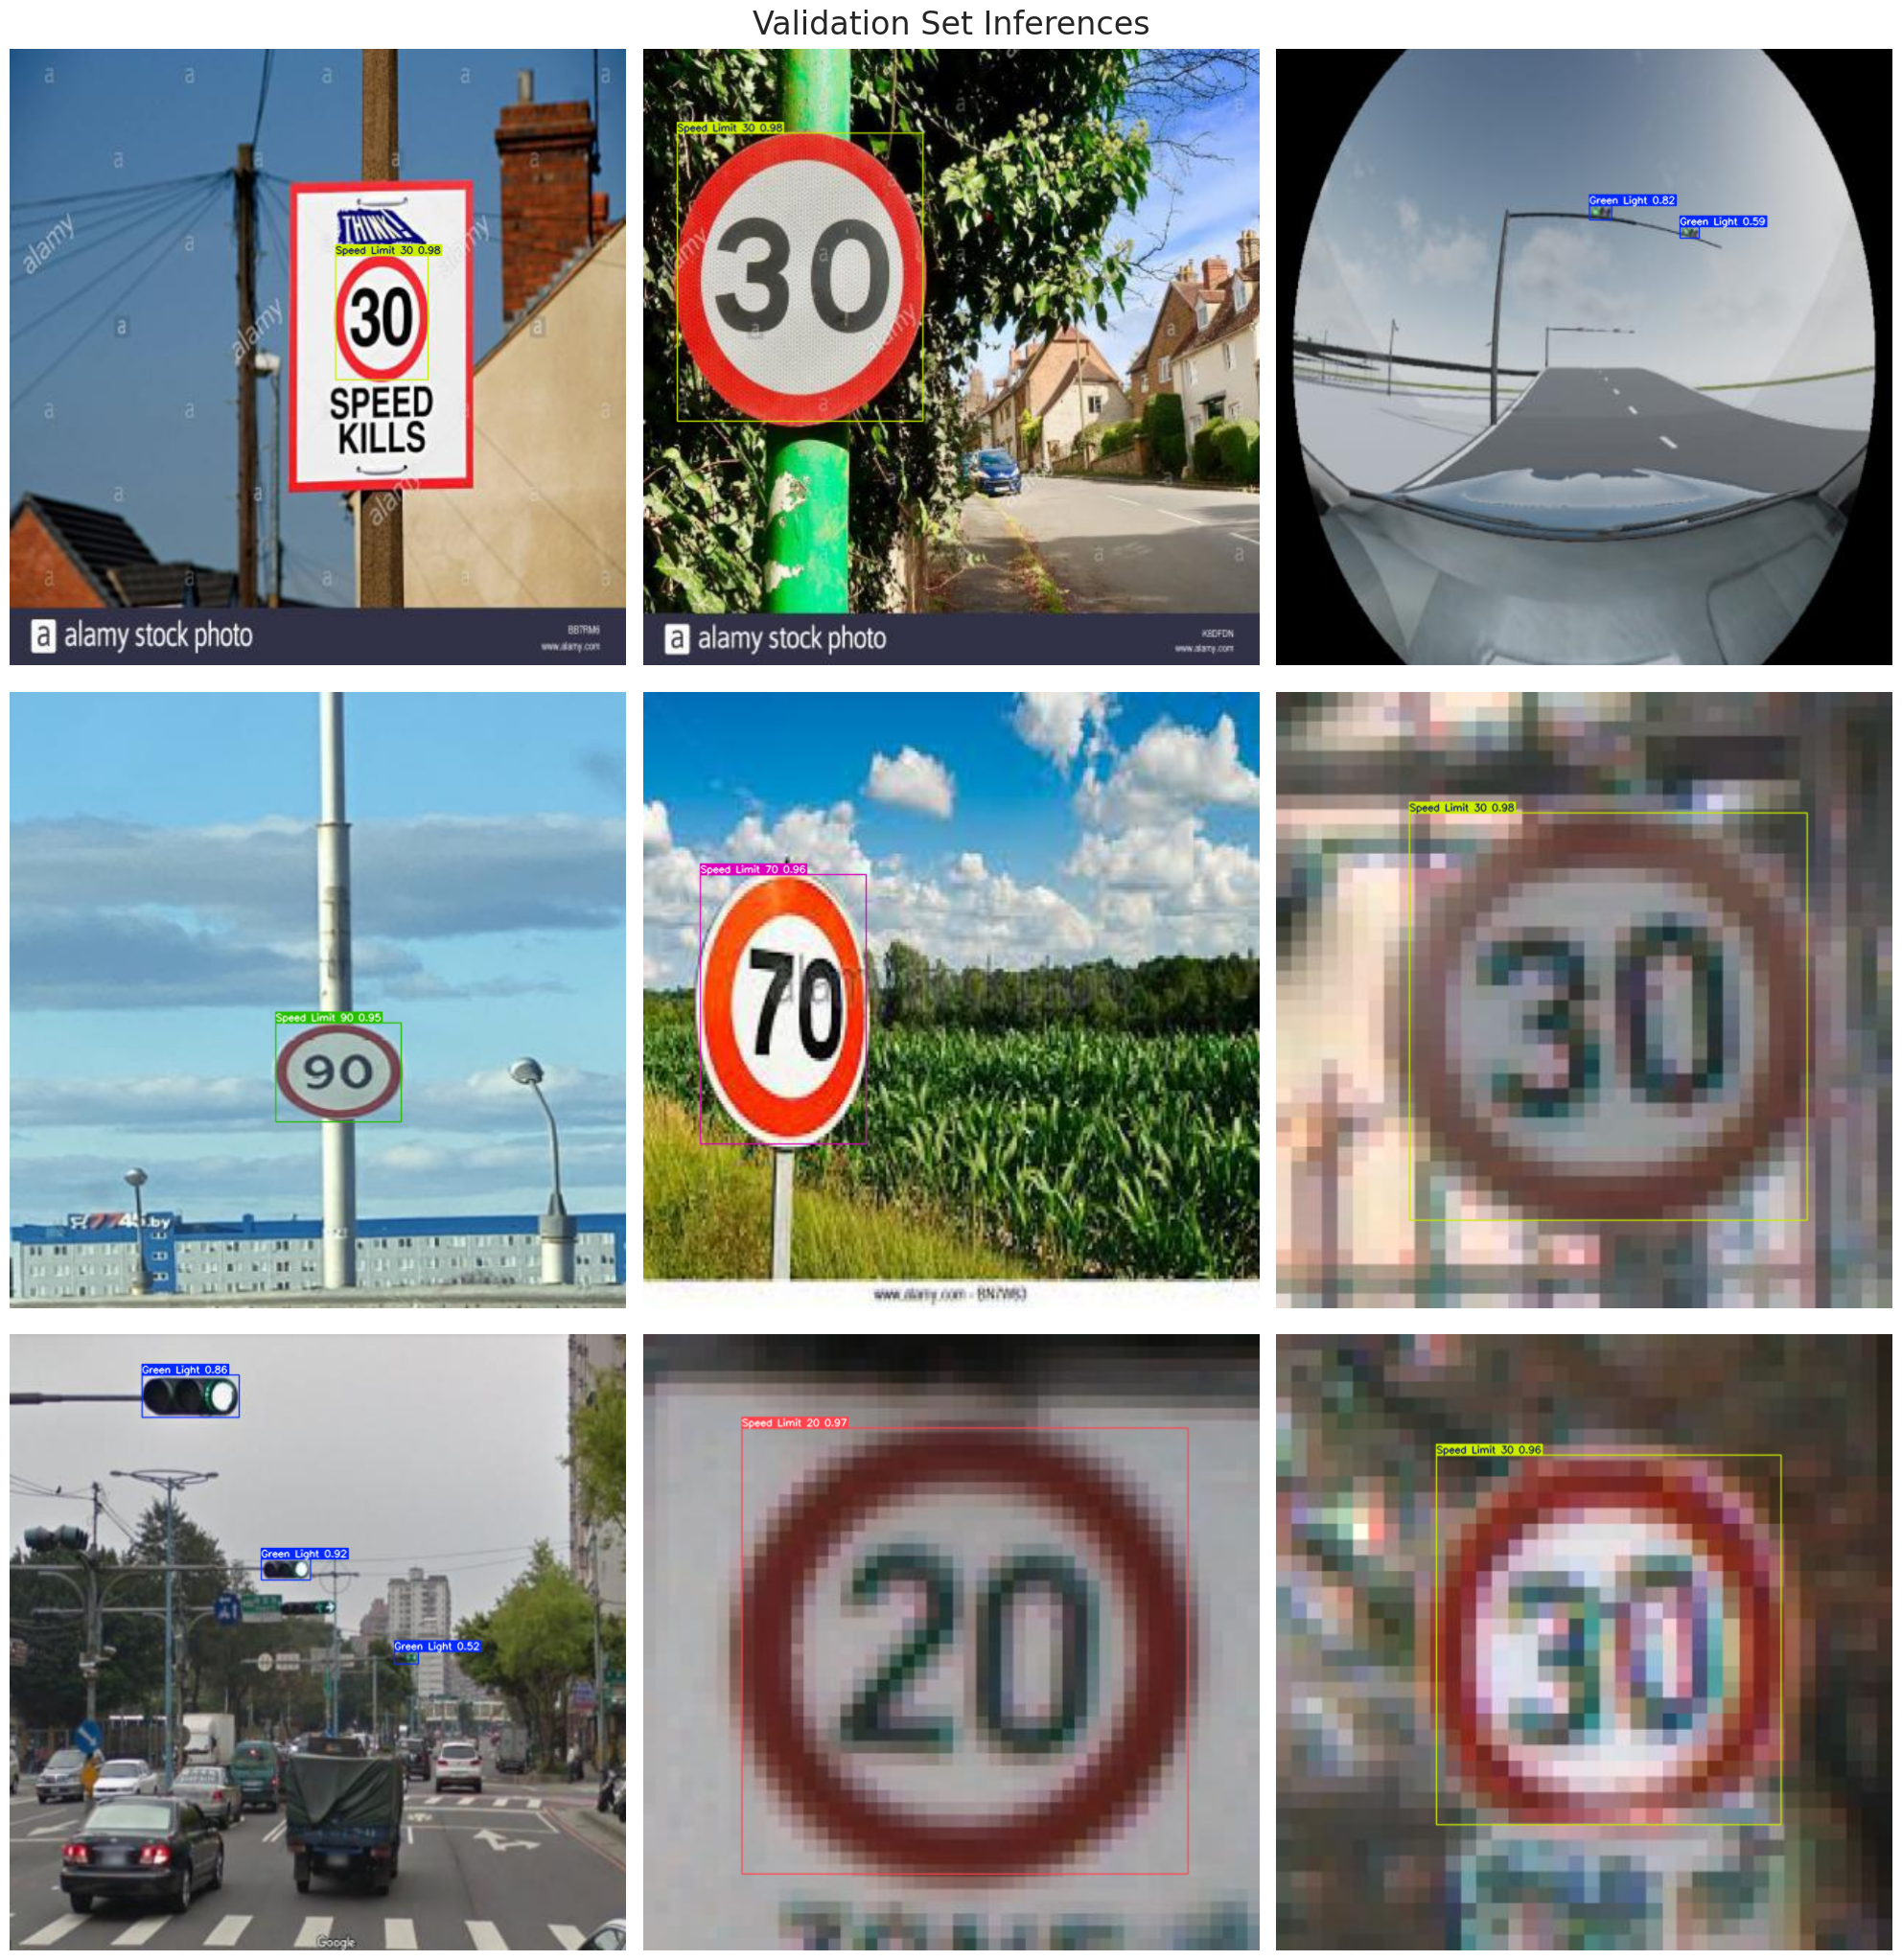

In [ ]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/content/drive/MyDrive/car_dataset'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()